In [18]:
import random
import csv
import platform
import matplotlib.pyplot as plot

genders = ['male','female']
names = ['Larsi', 'Lone', 'Troels', 'Tina', 'Klunk', 'Tais', 'Zukmidek']
courses = ['Music','History', 'Arts and crafts', 'Physics']
classRooms = ['1.0','1.1','1.2','1.3', '1.4','1.5']


class Student():

    def __init__(self, name, gender, data_sheet, image_url):
      self.name = name
      self.gender = gender
      self.data_sheet = data_sheet
      self.image_url = image_url

    def __repr__(self):
      return 'Student(%r,%r,%r)' % (self.name, self.gender, self.image_url)

    def __str__(self):
        return 'Student {name}, {gender}, {image_url}, {data_sheet}'.format(name=self.name, gender=self.gender, image_url=self.image_url, data_sheet=self.data_sheet)



    def get_avg_grade(self):
        grade_list = [int(grade) for grade in self.data_sheet.get_grades_as_list()]
        if len(grade_list) == 0:
          return 0
        return sum(grade_list) / len(grade_list)
    
    def calculate_student_progression(self):
        return (sum([float(course.ECTS) for course in self.data_sheet.courses]) / 150) * 100
        

class Course():

    def __init__ (self, name, classRoom, teacher, ECTS, grade = None):
      self.name=name
      self.classRoom = classRoom
      self.teacher = teacher
      self.ECTS = ECTS
      self.grade = grade

    def __str__(self):
      return 'Course: {name}, classroom: {classRoom}, Teacher: {teacher}, ECTS: {ECTS}'.format(name=self.name, classRoom=self.classRoom, teacher=self.teacher, ECTS={self.ECTS})


class DataSheet():

    def __init__(self, courses):
      self.courses = courses

    def __str__(self):
      stringified = ""
      for idx in range (0, len(self.courses)):
        if idx == 0:
          stringified += str(self.courses[idx])
        else:
          stringified += '\n' + str(self.courses[idx])
      return stringified

    def get_grades_as_list(self):
      grades_list = []
      for course in self.courses:
        if course.grade != None:
          grades_list.append(course.grade)
      return grades_list

  
def generate_students(n):
  generated_students = []
  course1 = Course('History', random.choice(classRooms), "Jim", 15)
  course2 = Course('English', random.choice(classRooms), "Jane", 20)
  course3 = Course('Biology', random.choice(classRooms), "June", 10)
  course4 = Course('Physics', random.choice(classRooms), "John", 15)
  course5 = Course('Music', random.choice(classRooms), "Jürgen", 20)
  courses = [course1, course2, course3, course4, course5]
  grades = [-3, 00, 2, 4, 7, 10 ,12]

  for index in range (0,n):
    gender = random.choice(genders)
    name = random.choice(names)
    image_url = name+'.img'
    student_courses = []
    for course in courses:
      isEnrolled = random.choice([True, False])
      if isEnrolled == True:
        grade = random.choice(grades)
        course.grade = grade
        student_courses.append(course)
    data_sheet = DataSheet(student_courses)
    student = Student(name, gender, data_sheet, image_url)
    generated_students.append(student)
  return generated_students;



def read_students_from_csv(inputfile):
  students = []
  with open(inputfile) as file_object:
    reader = csv.reader(file_object, delimiter=',')
    previous_student = None
    tmp_courses = []
    next(reader)
    for row in reader:
      current_student = Student(*row[0:2], [],row[7])
      current_course = Course(*row[2:6])
      if previous_student is None or current_student.name == previous_student.name:
        tmp_courses.append(current_course)
      else:
        previous_student.data_sheet = DataSheet(tmp_courses)
        students.append(previous_student)
        tmp_courses = [current_course]
      previous_student = current_student
    previous_student.data_sheet = DataSheet(tmp_courses)
    students.append(previous_student)
  return students

def sort_students_by_avg_grade(studentList):
  return sorted(student_list, key=lambda student: student.get_avg_grade(), reverse=True)

write_students_to_csv(generate_students(5),'./students.csv')
student_list = read_students_from_csv('./students.csv')
print(sort_students_by_avg_grade(student_list))

def bar_plot_student_grades(students):
    sorted_list = sort_students_by_avg_grade(students)
    student_names = [student.name for student in sorted_list]
    student_grades = [student.get_avg_grade() for student in sorted_list]
    plot.bar(student_names, student_grades, width=0.5, align='center')
    plot.title('Avg. Grades', fontsize=12)
    plot.xlabel('Students', fontsize=10)
    plot.ylabel('Avg Grades', fontsize=10)
    plot.show()

bar_plot_student_grades(student_list)

[Student('Tais','male','Tais.img'), Student('Klunk','male','Klunk.img'), Student('Larsi','female','Larsi.img'), Student('Zukmidek','female','Zukmidek.img'), Student('Troels','male','Troels.img')]


<IPython.core.display.Javascript object>


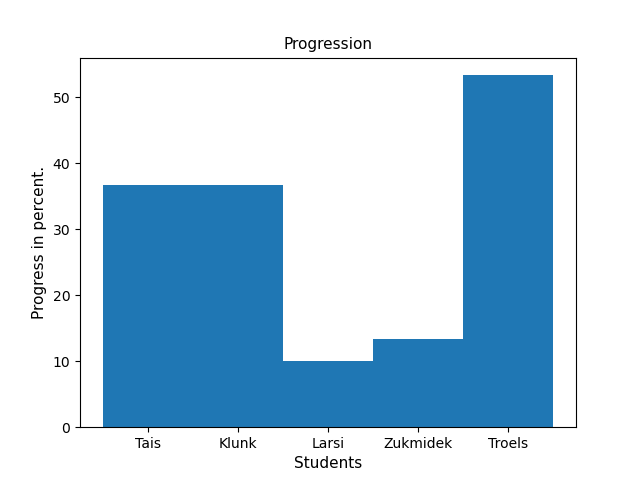

In [20]:

%matplotlib notebook
import matplotlib.pyplot as plot



def plot_student_progression(students):
    names = [student.name for student in students]
    progression = [student.calculate_student_progression() for student in students]
    plot.bar(names, progression, width=1)
    plot.title('Progression', fontsize=11)
    plot.xlabel('Students', fontsize=11)
    plot.ylabel('Progress in percent.', fontsize=11)
    plot.show()

plot_student_progression(read_students_from_csv('./students.csv'))